In [1]:
import numpy as np
import tensorflow as tf

class TestModel(tf.Module):
  def __init__(self):
    super(TestModel, self).__init__()

  @tf.function(input_signature=[tf.TensorSpec(shape=[1, 10], dtype=tf.float32)])
  def add(self, x):
    '''
    Simple method that accepts single input 'x' and returns 'x' + 4.
    '''
    # Name the output 'result' for convenience.
    return {'result' : x + 4}


# SAVED_MODEL_PATH = 'content/saved_models/test_variable'
TFLITE_FILE_PATH = 'detect.tflite'

# Save the model
module = TestModel()
# You can omit the signatures argument and a default signature name will be
# created with name 'serving_default'.
# tf.saved_model.save(module, SAVED_MODEL_PATH,signatures={'my_signature':module.add.get_concrete_function()})

# Convert the model using TFLiteConverter
# converter = tf.lite.TFLiteConverter.from_saved_model(SAVED_MODEL_PATH)
# tflite_model = converter.convert()
# with open(TFLITE_FILE_PATH, 'wb') as f:
  # f.write(tflite_model)

# Load the TFLite model in TFLite Interpreter
interpreter = tf.lite.Interpreter(TFLITE_FILE_PATH)
# There is only 1 signature defined in the model,
# so it will return it by default.
# If there are multiple signatures then we can pass the name.
my_signature = interpreter.get_signature_runner()

# my_signature is callable with input as arguments.
output = my_signature(x=tf.constant([1.0], shape=(1,10), dtype=tf.float32))
# 'output' is dictionary with all outputs from the inference.
# In this case we have single output 'result'.
print(output['result'])

AttributeError: module 'tensorflow' has no attribute 'Module'

In [2]:


import numpy as np
import tensorflow as tf

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="converted_model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on random input data.
input_shape = input_details[0]['shape']
input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

AttributeError: module 'tensorflow' has no attribute 'lite'

In [ ]:
import numpy as np
import tensorflow as tf

img = tf.placeholder(name="img", dtype=tf.float32, shape=(1, 64, 64, 3))
const = tf.constant([1., 2., 3.]) + tf.constant([1., 4., 4.])
val = img + const
out = tf.identity(val, name="out")

# Convert to TF Lite format
with tf.Session() as sess:
  converter = tf.lite.TFLiteConverter.from_session(sess, [img], [out])
  tflite_model = converter.convert()

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Continue to get tensors and so forth, as shown above...

In [ ]:
# Create train data:
# python generate_tfrecord.py -x C:/Maha/dev/Temp/PHD_FYP_TEMP/TensorFlow/workspace/training_demo/images/train -l C:/Maha/dev/Temp/PHD_FYP_TEMP/TensorFlow/workspace/training_demo/annotations/label_map.pbtxt -o C:/Maha/dev/Temp/PHD_FYP_TEMP/TensorFlow/workspace/training_demo/annotations/train.record

# # Create test data:
# python generate_tfrecord.py -x C:/Maha/dev/Temp/PHD_FYP_TEMP/TensorFlow/workspace/training_demo/images/test -l C:/Maha/dev/Temp/PHD_FYP_TEMP/TensorFlow/workspace/training_demo/annotations/label_map.pbtxt -o C:/Maha/dev/Temp/PHD_FYP_TEMP/TensorFlow/workspace/training_demo/annotations/test.record

# For example
# python generate_tfrecord.py -x C:/Users/sglvladi/Documents/Tensorflow/workspace/training_demo/images/train -l C:/Users/sglvladi/Documents/Tensorflow/workspace/training_demo/annotations/label_map.pbtxt -o C:/Users/sglvladi/Documents/Tensorflow/workspace/training_demo/annotations/train.record
# python generate_tfrecord.py -x C:/Users/sglvladi/Documents/Tensorflow/workspace/training_demo/images/test -l C:/Users/sglvladi/Documents/Tensorflow2/workspace/training_demo/annotations/label_map.pbtxt -o C:/Users/sglvladi/Documents/Tensorflow/workspace/training_demo/annotations/test.record

In [3]:
import cv2

In [2]:
image = cv2.imread("C://Maha//dev//Temp//PHD_FYP_TEMP//TensorFlow//workspace//training_demo//images//train//1 (2).jpg")

In [3]:
cv2.imwrite("C://Maha//dev//Temp//PHD_FYP_TEMP//TensorFlow//workspace//training_demo//images//train//1 (2).jpeg", image)

True

In [7]:
import os
from tqdm import tqdm
# path ='C://Maha//dev//Github//PHD_FYP//Dataset//train//potholes'
path ='C://Maha//dev//Github//PHD_FYP//Dataset//train//normal'
list_files = []
for root, dirs, files in os.walk(path):
	for file in files:
		list_files.append(os.path.join(root,file))
for name in tqdm(list_files):
    if name.endswith('.jpg'):
        try:
            print('OK',end='')
            image = cv2.imread(name)
            k,j = name.split('.jpg')
            new_name = k + '.JPEG'
            cv2.imwrite(new_name, image)
            os.remove(name)
        except Exception:
            print('ERR : ',name)
    # print(name)
list_files = []
for root, dirs, files in os.walk(path):
	for file in files:
		list_files.append(os.path.join(root,file))
for name in list_files:
    print(name)


  1%|          | 4/352 [00:00<00:09, 37.68it/s]

OKOKOKOKOKOKOK

  3%|▎         | 12/352 [00:00<00:09, 37.28it/s]

OKOKOKOKOKOKOKOKOKOK

  6%|▌         | 21/352 [00:00<00:10, 32.95it/s]

OKOKOKOKOKOK

  7%|▋         | 25/352 [00:00<00:10, 32.13it/s]

OKOKOKOKOK

  9%|▉         | 32/352 [00:01<00:12, 25.27it/s]

OKOKOKOKOK

 10%|▉         | 35/352 [00:01<00:13, 23.53it/s]

OKOKOKOKOK

 12%|█▏        | 41/352 [00:01<00:14, 21.23it/s]

OKOKOKOK

 12%|█▎        | 44/352 [00:01<00:16, 18.65it/s]

OKOKOKOK

 14%|█▍        | 51/352 [00:02<00:21, 14.19it/s]

OKOKOKOKOKOKOK

 16%|█▌        | 56/352 [00:02<00:19, 15.02it/s]

OKOKOKOKOK

 18%|█▊        | 62/352 [00:03<00:16, 17.69it/s]

OKOKOKOK

 19%|█▉        | 66/352 [00:03<00:14, 19.73it/s]

OKOKOKOKOKOK

 21%|██        | 73/352 [00:04<00:27, 10.31it/s]

OKOKOKOKOKOK

 22%|██▏       | 76/352 [00:04<00:21, 12.55it/s]

OKOKOKOKOKOK

 24%|██▍       | 84/352 [00:04<00:16, 15.94it/s]

OKOKOKOKOKOKOKOKOK

 26%|██▌       | 92/352 [00:05<00:12, 20.81it/s]

OKOKOKOKOKOKOK

 29%|██▊       | 101/352 [00:05<00:09, 26.99it/s]

OKOKOKOKOKOKOK

 31%|███       | 108/352 [00:05<00:09, 26.01it/s]

OKOKOKOKOKOKOK

 32%|███▏      | 111/352 [00:05<00:10, 23.43it/s]

OKOKOKOK

 33%|███▎      | 117/352 [00:06<00:10, 21.49it/s]

OKOKOKOKOK

 35%|███▍      | 123/352 [00:06<00:11, 19.15it/s]

OKOKOKOKOK

 36%|███▌      | 126/352 [00:06<00:10, 21.10it/s]

OKOKOKOKOKOKOK

 39%|███▊      | 136/352 [00:06<00:07, 29.47it/s]

OKOKOKOKOKOKOKOK

 41%|████      | 145/352 [00:07<00:05, 34.61it/s]

OKOKOKERR :  C://Maha//dev//Github//PHD_FYP//Dataset//train//normal\226.jpg
OKOKOKOKOK

 42%|████▏     | 149/352 [00:07<00:06, 30.94it/s]

OKOKOKOKOKOK

 44%|████▍     | 156/352 [00:07<00:10, 18.81it/s]

OKOKOKOKOKOK

 46%|████▌     | 161/352 [00:08<00:08, 23.01it/s]

OKOKOKOKOK

 48%|████▊     | 169/352 [00:08<00:07, 24.05it/s]

OKOKOKOKOKOK

 49%|████▉     | 172/352 [00:08<00:07, 23.80it/s]

OKOKOKOKOK

 51%|█████     | 178/352 [00:08<00:07, 23.40it/s]

OKOKOKOKOKOK

 53%|█████▎    | 186/352 [00:09<00:07, 23.27it/s]

OKOKOKOKOK

 54%|█████▎    | 189/352 [00:09<00:07, 22.71it/s]

OKOKOKOK

 55%|█████▌    | 195/352 [00:09<00:06, 24.83it/s]

OKOKOKOKOKOK

 57%|█████▋    | 201/352 [00:09<00:06, 22.30it/s]

OKOKOKOKOK

 58%|█████▊    | 204/352 [00:09<00:06, 23.34it/s]

OKOKOKOKOK

 60%|█████▉    | 210/352 [00:10<00:06, 22.08it/s]

OKOKOKOK

 61%|██████    | 213/352 [00:10<00:06, 20.97it/s]

OKOKOKOKOK

 61%|██████▏   | 216/352 [00:10<00:13, 10.16it/s]

OKOKOKOK

 63%|██████▎   | 221/352 [00:11<00:10, 12.87it/s]

OKOKOKOKOK

 65%|██████▍   | 228/352 [00:11<00:06, 19.72it/s]

OKOKOKOKOKOKOK

 66%|██████▋   | 234/352 [00:11<00:06, 19.14it/s]

OKOKOKOK

 67%|██████▋   | 237/352 [00:11<00:06, 19.15it/s]

OKOKOKOKOKOK

 68%|██████▊   | 241/352 [00:12<00:04, 23.08it/s]

OK

 69%|██████▉   | 244/352 [00:12<00:10, 10.78it/s]

OKOKOKOK

 71%|███████▏  | 251/352 [00:12<00:06, 16.30it/s]

OKOKOKOKOKOK

 72%|███████▏  | 254/352 [00:13<00:06, 15.60it/s]

OKOKOKOKOKOK

 73%|███████▎  | 258/352 [00:13<00:04, 19.45it/s]

OKOKOK

 74%|███████▍  | 261/352 [00:13<00:05, 16.79it/s]

OKOK

 76%|███████▌  | 268/352 [00:14<00:06, 12.04it/s]

OKOKOKOKOKOKOK

 77%|███████▋  | 272/352 [00:14<00:05, 14.59it/s]

OKOKOKOKOKOK

 79%|███████▉  | 279/352 [00:14<00:04, 17.97it/s]

OKOKOKOKOKOKOK

 82%|████████▏ | 287/352 [00:15<00:02, 23.92it/s]

OKOKOKOKOKOK

 84%|████████▎ | 294/352 [00:15<00:02, 20.03it/s]

OKOKOKOKOKOKOK

 84%|████████▍ | 297/352 [00:15<00:02, 21.89it/s]

OKOK

 85%|████████▌ | 300/352 [00:16<00:03, 13.17it/s]

OKOKOKOK

 87%|████████▋ | 306/352 [00:16<00:02, 16.70it/s]

OKOKOKOKOKOKOK

 89%|████████▉ | 313/352 [00:16<00:02, 14.39it/s]

OKOKOKOKOKOKOKOK

 91%|█████████ | 320/352 [00:17<00:01, 19.22it/s]

OKOKOKOKOKOKOK

 93%|█████████▎| 327/352 [00:17<00:01, 14.68it/s]

OKOKOK

 94%|█████████▍| 330/352 [00:17<00:01, 16.88it/s]

OKOKOKOKOK

 95%|█████████▌| 336/352 [00:18<00:00, 18.18it/s]

OKOKOKOKOK

 96%|█████████▋| 339/352 [00:18<00:00, 13.18it/s]

OKOKOKOKOK

 98%|█████████▊| 344/352 [00:18<00:00, 14.25it/s]

OKOKOKOKOKOK

 99%|█████████▉| 350/352 [00:20<00:00,  7.65it/s]

OKOKOKOK

100%|██████████| 352/352 [00:20<00:00, 17.31it/s]


C://Maha//dev//Github//PHD_FYP//Dataset//train//normal\1.JPEG
C://Maha//dev//Github//PHD_FYP//Dataset//train//normal\10.JPEG
C://Maha//dev//Github//PHD_FYP//Dataset//train//normal\100.JPEG
C://Maha//dev//Github//PHD_FYP//Dataset//train//normal\101.JPEG
C://Maha//dev//Github//PHD_FYP//Dataset//train//normal\102.JPEG
C://Maha//dev//Github//PHD_FYP//Dataset//train//normal\103.JPEG
C://Maha//dev//Github//PHD_FYP//Dataset//train//normal\104.JPEG
C://Maha//dev//Github//PHD_FYP//Dataset//train//normal\105.JPEG
C://Maha//dev//Github//PHD_FYP//Dataset//train//normal\106.JPEG
C://Maha//dev//Github//PHD_FYP//Dataset//train//normal\107.JPEG
C://Maha//dev//Github//PHD_FYP//Dataset//train//normal\108.JPEG
C://Maha//dev//Github//PHD_FYP//Dataset//train//normal\109.JPEG
C://Maha//dev//Github//PHD_FYP//Dataset//train//normal\11.JPEG
C://Maha//dev//Github//PHD_FYP//Dataset//train//normal\110.JPEG
C://Maha//dev//Github//PHD_FYP//Dataset//train//normal\111.JPEG
C://Maha//dev//Github//PHD_FYP//Dataset//tra

In [8]:
for name in tqdm(list_files):
    if name.endswith('.jpg'):
        os.remove(name)

100%|██████████| 352/352 [00:00<00:00, 343587.39it/s]


In [10]:
import os
# path ='C://Maha//dev//Github//PHD_FYP//Dataset//train//potholes'
path ='C://Maha//dev//Github//PHD_FYP//Dataset//train//normal'
os.chdir(path)
print(os.getcwd())

for count, f in enumerate(os.listdir()):
    f_name, f_ext = os.path.splitext(f)
    f_name = "img_normal" + '{0:05d}'.format(count)
    new_name = f'{f_name}{f_ext}'
    print(new_name)
    os.rename(f, new_name)

C:\Maha\dev\Github\PHD_FYP\Dataset\train\normal
img_normal00000.JPEG
img_normal00001.JPEG
img_normal00002.JPEG
img_normal00003.JPEG
img_normal00004.JPEG
img_normal00005.JPEG
img_normal00006.JPEG
img_normal00007.JPEG
img_normal00008.JPEG
img_normal00009.JPEG
img_normal00010.JPEG
img_normal00011.JPEG
img_normal00012.JPEG
img_normal00013.JPEG
img_normal00014.JPEG
img_normal00015.JPEG
img_normal00016.JPEG
img_normal00017.JPEG
img_normal00018.JPEG
img_normal00019.JPEG
img_normal00020.JPEG
img_normal00021.JPEG
img_normal00022.JPEG
img_normal00023.JPEG
img_normal00024.JPEG
img_normal00025.JPEG
img_normal00026.JPEG
img_normal00027.JPEG
img_normal00028.JPEG
img_normal00029.JPEG
img_normal00030.JPEG
img_normal00031.JPEG
img_normal00032.JPEG
img_normal00033.JPEG
img_normal00034.JPEG
img_normal00035.JPEG
img_normal00036.JPEG
img_normal00037.JPEG
img_normal00038.JPEG
img_normal00039.JPEG
img_normal00040.JPEG
img_normal00041.JPEG
img_normal00042.JPEG
img_normal00043.JPEG
img_normal00044.JPEG
img_nor

In [2]:
import os
path ='C://Maha//dev//Temp//PHD_FYP_TEMP//TensorFlow//workspace//training_demo//images//test//'
list_files = []
for root, dirs, files in os.walk(path):
	for file in files:
		list_files.append(os.path.join(root,file))
for name in list_files:
    if name.endswith('.jpg'):
        print('JPG :',end='')
        image = cv2.imread(name)
        k,j = name.split('.jpg')
        new_name = k + '.JPEG'
        cv2.imwrite(new_name, image)
        os.remove(name)
    # print(name)
list_files = []
for root, dirs, files in os.walk(path):
	for file in files:
		list_files.append(os.path.join(root,file))
for name in list_files:
    print(name)

C://Maha//dev//Temp//PHD_FYP_TEMP//TensorFlow//workspace//training_demo//images//test//31 (2).JPEG
C://Maha//dev//Temp//PHD_FYP_TEMP//TensorFlow//workspace//training_demo//images//test//31 (2).xml
C://Maha//dev//Temp//PHD_FYP_TEMP//TensorFlow//workspace//training_demo//images//test//31.JPEG
C://Maha//dev//Temp//PHD_FYP_TEMP//TensorFlow//workspace//training_demo//images//test//31.xml
C://Maha//dev//Temp//PHD_FYP_TEMP//TensorFlow//workspace//training_demo//images//test//32 (2).JPEG
C://Maha//dev//Temp//PHD_FYP_TEMP//TensorFlow//workspace//training_demo//images//test//32 (2).xml
C://Maha//dev//Temp//PHD_FYP_TEMP//TensorFlow//workspace//training_demo//images//test//32.JPEG
C://Maha//dev//Temp//PHD_FYP_TEMP//TensorFlow//workspace//training_demo//images//test//32.xml
C://Maha//dev//Temp//PHD_FYP_TEMP//TensorFlow//workspace//training_demo//images//test//33 (2).JPEG
C://Maha//dev//Temp//PHD_FYP_TEMP//TensorFlow//workspace//training_demo//images//test//33 (2).xml
C://Maha//dev//Temp//PHD_FYP_TE

# TESTING
Test Saved model @ C:\Maha\dev\Temp\PHD_FYP_TEMP\TensorFlow\workspace\training_demo\exported-models\my_model

In [12]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
# from google.colab.patches import cv2_imshow
# import cv2_imshow from cv2

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# PROVIDE PATH TO IMAGE DIRECTORY
# IMAGE_PATHS = '/content/training_demo/images/train/image1.jpg'
IMAGE_PATHS = 'C:/Maha/dev/Temp/PHD_FYP_TEMP/TensorFlow/workspace/training_demo/images/test/37.JPEG'


# PROVIDE PATH TO MODEL DIRECTORY
# PATH_TO_MODEL_DIR = '/content/training_demo/exported_models/my_model'
PATH_TO_MODEL_DIR = 'C:/Maha/dev/Temp/PHD_FYP_TEMP/TensorFlow/workspace/training_demo/exported-models/my_model'

# PROVIDE PATH TO LABEL MAP
# PATH_TO_LABELS = '/content/training_demo/annotations/label_map.pbtxt'
PATH_TO_LABELS = 'C:/Maha/dev/Temp/PHD_FYP_TEMP/TensorFlow/workspace/training_demo/annotations/label_map.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.60)

# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))




print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=0.5,
      agnostic_mode=False)

print('Done')
# DISPLAYS OUTPUT IMAGE
cv2.imshow("TEST",image_with_detections)
cv2.waitKey(0)
# CLOSES WINDOW ONCE KEY IS PRESSED

cv2.destroyAllWindows()


Loading model...Done! Took 18.742287635803223 seconds
Running inference for C:/Maha/dev/Temp/PHD_FYP_TEMP/TensorFlow/workspace/training_demo/images/test/37.JPEG... Done


In [13]:
import os
path ='C://Maha//dev//Temp//PHD_FYP_TEMP//TensorFlow//workspace//training_demo//images//test//'
list_files = []
for root, dirs, files in os.walk(path):
	for file in files:
		list_files.append(os.path.join(root,file))
# for name in list_files:
#     print(name)

In [14]:
images_test_ = [l for l in list_files if l.endswith('.JPEG') ]
images_test_

['C://Maha//dev//Temp//PHD_FYP_TEMP//TensorFlow//workspace//training_demo//images//test//31 (2).JPEG',
 'C://Maha//dev//Temp//PHD_FYP_TEMP//TensorFlow//workspace//training_demo//images//test//31.JPEG',
 'C://Maha//dev//Temp//PHD_FYP_TEMP//TensorFlow//workspace//training_demo//images//test//32 (2).JPEG',
 'C://Maha//dev//Temp//PHD_FYP_TEMP//TensorFlow//workspace//training_demo//images//test//32.JPEG',
 'C://Maha//dev//Temp//PHD_FYP_TEMP//TensorFlow//workspace//training_demo//images//test//33 (2).JPEG',
 'C://Maha//dev//Temp//PHD_FYP_TEMP//TensorFlow//workspace//training_demo//images//test//33.JPEG',
 'C://Maha//dev//Temp//PHD_FYP_TEMP//TensorFlow//workspace//training_demo//images//test//34 (2).JPEG',
 'C://Maha//dev//Temp//PHD_FYP_TEMP//TensorFlow//workspace//training_demo//images//test//34.JPEG',
 'C://Maha//dev//Temp//PHD_FYP_TEMP//TensorFlow//workspace//training_demo//images//test//35 (2).JPEG',
 'C://Maha//dev//Temp//PHD_FYP_TEMP//TensorFlow//workspace//training_demo//images//test//

(752, 1128, 3)


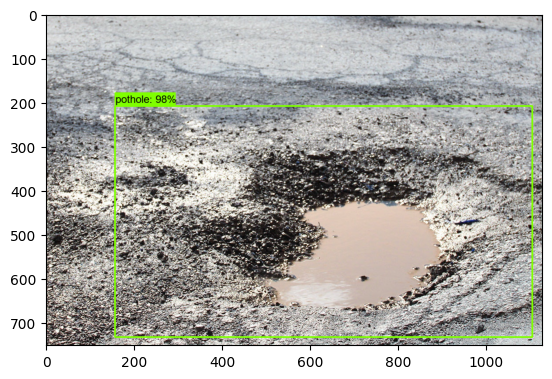

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
%matplotlib inline

# im = cv2.imread('IMG_FILENAME',0)
h,w = image_with_detections.shape[:2]
print(image_with_detections.shape)
plt.imshow(image_with_detections,cmap='gray')
plt.show()

In [17]:
img_name = 'C://Maha//dev//Temp//PHD_FYP_TEMP//TensorFlow//workspace//training_demo//images//test//34.JPEG'
img_name.split('//')[-1]

'34.JPEG'

In [18]:

isWritten = cv2.imwrite('C://Maha//dev//Temp//PHD_FYP_TEMP//TensorFlow//workspace//training_demo//images//result//Result'+img_name.split('//')[-1], image_with_detections)

if isWritten:
	print('Image is successfully saved as file.')

Image is successfully saved as file.


In [2]:
import warnings
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import label_map_util
import time
import argparse
import cv2
import tensorflow as tf
import pathlib
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# PROVIDE PATH TO IMAGE DIRECTORY
# IMAGE_PATHS = '/content/training_demo/images/train/image1.jpg'
IMAGE_PATHS = 'C:/Maha/dev/Temp/PHD_FYP_TEMP/TensorFlow/workspace/training_demo/images/test/37.JPEG'

# PROVIDE PATH TO MODEL DIRECTORY
# PATH_TO_MODEL_DIR = '/content/training_demo/exported_models/my_model'
PATH_TO_MODEL_DIR = 'C:/Maha/dev/Temp/PHD_FYP_TEMP/TensorFlow/workspace/training_demo/exported-models/my_model'

# PROVIDE PATH TO LABEL MAP
# PATH_TO_LABELS = '/content/training_demo/annotations/label_map.pbtxt'
PATH_TO_LABELS = 'C:/Maha/dev/Temp/PHD_FYP_TEMP/TensorFlow/workspace/training_demo/annotations/label_map.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.60)

# LOAD THE MODEL
PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)


def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
    path: the file path to the image
    Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))


def generate_result(IMAGE_PATHS):
    print('Running inference for {}... '.format(IMAGE_PATHS), end='')
    image = cv2.imread(IMAGE_PATHS)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_expanded = np.expand_dims(image_rgb, axis=0)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(
        np.int64)

    image_with_detections = image.copy()

    # SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
    viz_utils.visualize_boxes_and_labels_on_image_array(
        image_with_detections,
        detections['detection_boxes'],
        detections['detection_classes'],
        detections['detection_scores'],
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=200,
        min_score_thresh=0.5,
        agnostic_mode=False)

    print('Done')
    return image_with_detections
    # # DISPLAYS OUTPUT IMAGE
    # cv2.imshow("TEST",image_with_detections)
    # cv2.waitKey(0)
    # # CLOSES WINDOW ONCE KEY IS PRESSED

    # cv2.destroyAllWindows()


Loading model...Done! Took 12.417351722717285 seconds


In [6]:

# path = 'C://Maha//dev//Github//PHD_FYP//Dataset//train//normal//'
path = "C://Maha//dev//Github//PHD_FYP//Dataset//train//potholes"
list_files = []
for root, dirs, files in os.walk(path):
    for file in files:
        list_files.append(os.path.join(root, file))
# path = 'C://Maha//dev//Github//PHD_FYP//Dataset//train//normal//'
# for root, dirs, files in os.walk(path):
#     for file in files:
#         list_files.append(os.path.join(root, file))
# path = 'C://Maha//dev//Temp//PHD_FYP_TEMP//TensorFlow//workspace//training_demo//images//test//'
# for root, dirs, files in os.walk(path):
#     for file in files:
#         list_files.append(os.path.join(root, file))

images_test_ = [l for l in list_files if l.endswith('.JPEG')]
images_test_ = images_test_[:100]
FOLDER_TO_SAVE = 'C://Maha//dev//Github//PHD_FYP//Dataset//Result//res_'
for img_name in images_test_:
    try:
        image_with_detections = generate_result(img_name)
        isWritten = cv2.imwrite(FOLDER_TO_SAVE +
                                img_name.split('//')[-1], image_with_detections)
        if isWritten:
            print('[+] Image is successfully saved as file.')
        else:
            print("writing failes",img_name)
    except Exception:
        print('[-] ERR :', img_name)
print('Done')


Running inference for C://Maha//dev//Github//PHD_FYP//Dataset//train//potholes\img00000.JPEG... Done
writing failes C://Maha//dev//Github//PHD_FYP//Dataset//train//potholes\img00000.JPEG
Running inference for C://Maha//dev//Github//PHD_FYP//Dataset//train//potholes\img00001.JPEG... Done
writing failes C://Maha//dev//Github//PHD_FYP//Dataset//train//potholes\img00001.JPEG
Running inference for C://Maha//dev//Github//PHD_FYP//Dataset//train//potholes\img00002.JPEG... Done
writing failes C://Maha//dev//Github//PHD_FYP//Dataset//train//potholes\img00002.JPEG
Running inference for C://Maha//dev//Github//PHD_FYP//Dataset//train//potholes\img00003.JPEG... Done
writing failes C://Maha//dev//Github//PHD_FYP//Dataset//train//potholes\img00003.JPEG
Running inference for C://Maha//dev//Github//PHD_FYP//Dataset//train//potholes\img00004.JPEG... Done
writing failes C://Maha//dev//Github//PHD_FYP//Dataset//train//potholes\img00004.JPEG
Running inference for C://Maha//dev//Github//PHD_FYP//Dataset//tr